In [ ]:
import tensorflow as tf
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import io
import seaborn as sns
import scipy.stats as stats
from google.colab import files

uploaded = files.upload()

Saving All_data_flow_Regime_1.csv to All_data_flow_Regime_1.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['All_data_flow_Regime_1.csv']))
# Dataset is now stored in a Pandas Dataframe
data['Regime'] = data['Regime'].astype('category') # encode 7 flow regime into 0 t0 6
data['Regime']=data['Regime'].cat.codes # encode 7 flow regime into 0 t0 6
X=data.iloc[:, 1:] # 22 Features
y=data.iloc[:, 0] # Traget 7 regimes
from collections import Counter
from sklearn import preprocessing,svm,metrics
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #Split data into train =70% , test=30%

In [ ]:
y_train.value_counts()

0    107
4     38
6     35
2     35
1     31
5     14
3     12
Name: Regime, dtype: int64

In [ ]:
y_test.value_counts()

0    48
4    15
2    15
1    15
3    11
6     9
5     4
Name: Regime, dtype: int64

In [ ]:
pip install XlsxWriter

     |████████████████████████████████| 153kB 5.8MB/s 


In [ ]:
df=pd.DataFrame(data)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('XGB_True_Lable.xlsx', engine ='xlsxwriter')
df.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Regime, dtype: int8

In [ ]:
X.head(5)

,Bond No,Convection No,FroudeL No,FroudeG No,FroudeLO No,FroudeGO No,Galileo_no,Kapitza no,ReL No,ReG No,ReLO No,ReGO No,Suratman L No,Suratman G No,WeL No,WeG No,WeLO No,WeGO No,PrL No,PrG No,PecletL No,PecletG No
0,168696.6394,0.222475,0.073057,42.162050,0.223571,229.777516,1.380545e+09,0.0026,10203.253080,95853.9805,17849.03281,223770.6165,8183.597019,40121.32307,12721.346520,229005.0495,38930.06601,1248046.798,1.194307,0.735125,12185.818220,70464.61078
1,168696.6394,0.201949,0.065627,48.243041,0.223571,229.777516,1.380545e+09,0.0026,9670.446137,102533.7003,17849.03281,223770.6165,8183.597019,40121.32307,11427.435670,262034.2227,38930.06601,1248046.798,1.194307,0.735125,11549.483070,75375.03657
2,168696.6394,0.180884,0.057574,55.742418,0.223571,229.777516,1.380545e+09,0.0026,9057.718149,110215.3782,17849.03281,223770.6165,8183.597019,40121.32307,10025.207480,302767.4228,38930.06601,1248046.798,1.194307,0.735125,10817.697640,81022.02625
3,168696.6394,0.160507,0.049418,64.508156,0.223571,229.777516,1.380545e+09,0.0026,8391.709459,118565.0281,17849.03281,223770.6165,8183.597019,40121.32307,8605.114289,350378.9209,38930.06601,1248046.798,1.194307,0.735125,10022.278700,87160.05857
4,168696.6394,0.148257,0.044377,70.644045,0.223571,229.777516,1.380545e+09,0.0026,7952.143720,124075.7971,17849.03281,223770.6165,8183.597019,40121.32307,7727.236519,383706.2748,38930.06601,1248046.798,1.194307,0.735125,9497.302187,91211.15994


In [ ]:
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(estimator=classifier, param_distributions=params,  n_iter=100, n_jobs=-1, cv=10, verbose=3)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_ #Best parameter

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 15,
 'min_child_weight': 1}

In [ ]:
best_random_grid=random_search.best_estimator_
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
train_preds=best_random_grid.predict(X_train)
test_preds=best_random_grid.predict(X_test)

acc_train =best_random_grid.score(X_train,y_train)
acc_test  =best_random_grid.score(X_test,y_test)

print("RandomizedSearchCV accuracy on Training data:", acc_train)
print("RandomizedSearchCV accuracy on Test data:", acc_test )

print("cost of training model\n",metrics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of testing model\n",metrics.classification_report(y_test,test_preds))

RandomizedSearchCV accuracy on Training data: 0.9963235294117647
RandomizedSearchCV accuracy on Test data: 0.8717948717948718
cost of training model
 [[107   0   0   0   0   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  35   0   0   0   0]
 [  0   0   0  12   0   0   0]
 [  0   0   0   0  37   1   0]
 [  0   0   0   0   0  14   0]
 [  0   0   0   0   0   0  35]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        12
           4       1.00      0.97      0.99        38
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        35

    accuracy                           1.00       272
   macro avg       0.99      1.00      0.99       272
weighted avg       1.00      1.00      1.00       272

cost of tes

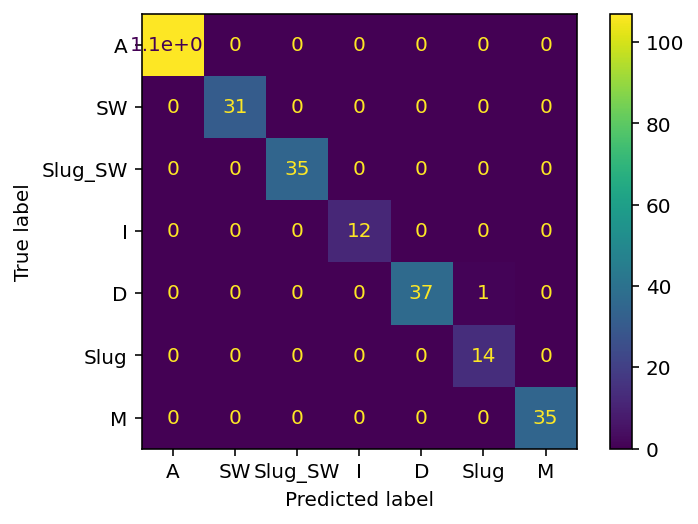

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['A', 'SW', 'Slug_SW', 'I', 'D', 'Slug', 'M']#############################

plot_confusion_matrix(best_random_grid, X_train, y_train, display_labels=class_names)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

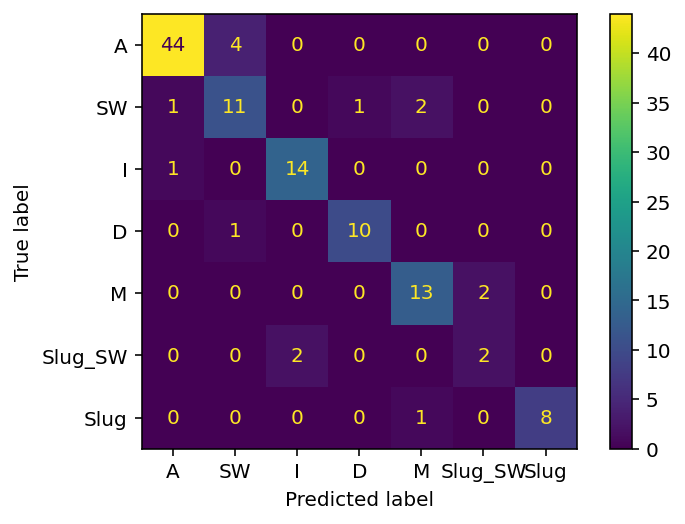

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['A', 'SW', 'I', 'D', 'M', 'Slug_SW', 'Slug' ]#############################

plot_confusion_matrix(best_random_grid, X_test, y_test, display_labels=class_names)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

#SHAP

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 5.8MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463906 sha256=3c0688e94fe7c5c5104833995a3c8b717aabee0c26ecc17b093f7380c0dacb67
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


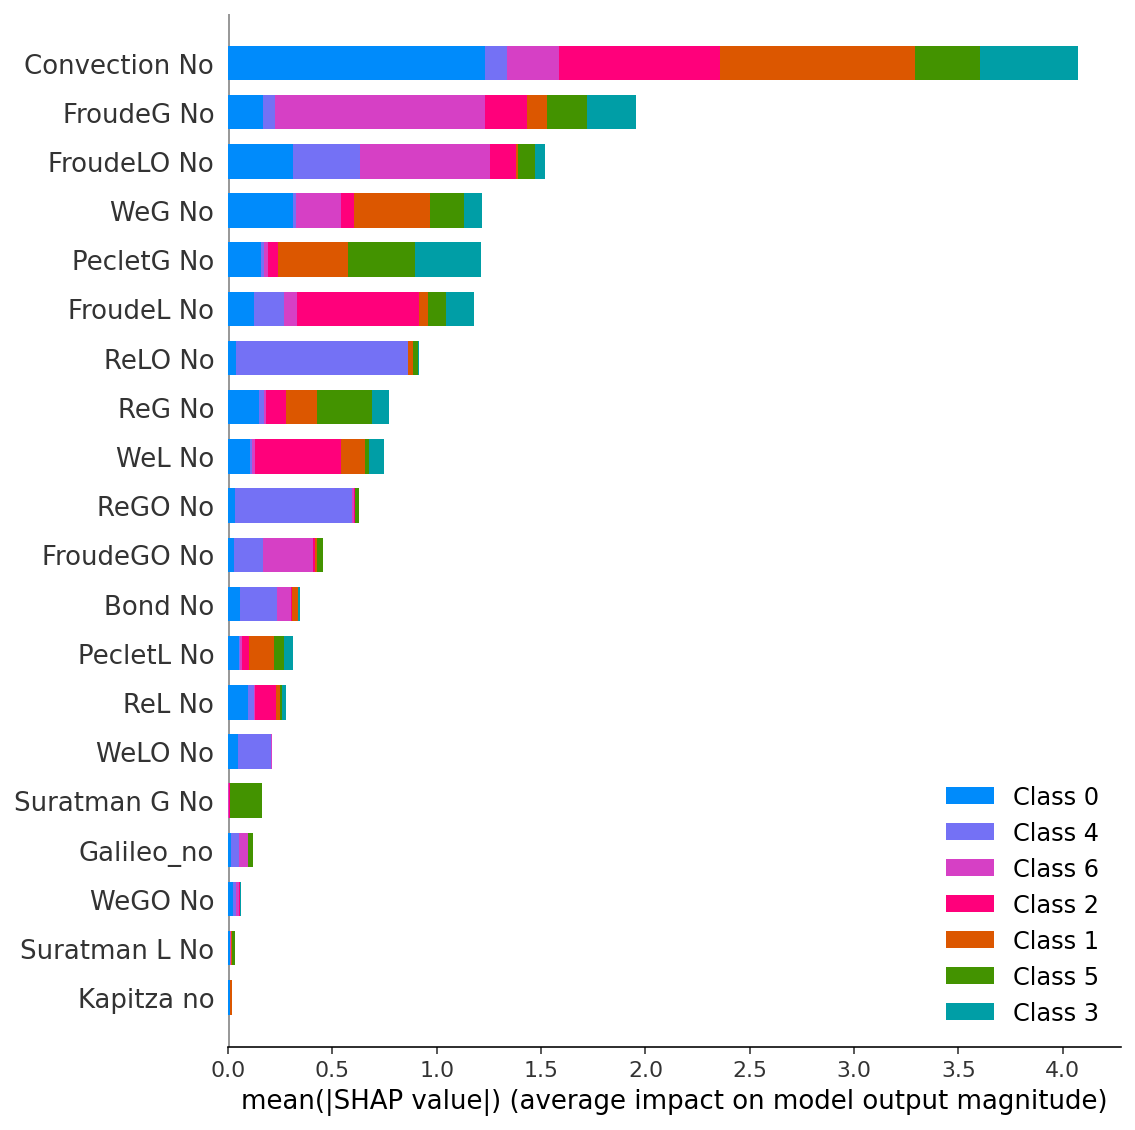

In [ ]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_random_grid)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X)
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X)

#Results

In [ ]:
uploaded = files.upload()

Saving Features.csv to Features.csv
Saving In_10_1.csv to In_10_1.csv
Saving In_10_2.csv to In_10_2.csv
Saving In_11_1.csv to In_11_1.csv
Saving In_11_2.csv to In_11_2.csv
Saving In_11_3.csv to In_11_3.csv
Saving In_11_4.csv to In_11_4.csv
Saving In_12_1.csv to In_12_1.csv
Saving In_12_2.csv to In_12_2.csv
Saving In_12_3.csv to In_12_3.csv
Saving In_12_4.csv to In_12_4.csv


In [ ]:
All_data = pd.read_csv(io.BytesIO(uploaded['Features.csv']))
Xnew = All_data
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Results_All_data_XGB.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#10

In [ ]:
R10_1 = pd.read_csv(io.BytesIO(uploaded['In_10_1.csv']))
Xnew = R10_1
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_10_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R10_2 = pd.read_csv(io.BytesIO(uploaded['In_10_2.csv']))
Xnew = R10_2
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_10_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#11

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_11_1.csv']))
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_11_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_11_2.csv']))
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_11_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_11_3.csv']))
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_11_3.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_11_4.csv']))
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_11_4.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#12

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_12_1.csv']))
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_12_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_12_2.csv']))
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_12_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_12_3.csv']))
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_12_3.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_12_4.csv']))
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_12_4.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#GCV

In [ ]:
params1={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
#### Fit the grid_search to the data
classifier1=xgboost.XGBClassifier()
grid_search=GridSearchCV(estimator=classifier1, param_grid=params1,  n_jobs=-1, cv=2, verbose=3)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 3840 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 1012 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2292 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3124 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4084 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 5172 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed:  7.1min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ght=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1,

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.3,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 1}

In [ ]:
best_grid_search=grid_search.best_estimator_
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
train_preds=best_grid_search.predict(X_train)
test_preds= best_grid_search.predict(X_test)

acc_train =best_grid_search.score(X_train,y_train)
acc_test  =best_grid_search.score(X_test,y_test)

print("RandomizedSearchCV accuracy on Training data:", acc_train)
print("RandomizedSearchCV accuracy on Test data:", acc_test )

print("cost of training model\n",metrics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of testing model\n",metrics.classification_report(y_test,test_preds))

RandomizedSearchCV accuracy on Training data: 0.9889705882352942
RandomizedSearchCV accuracy on Test data: 0.8632478632478633
cost of training model
 [[107   0   0   0   0   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  35   0   0   0   0]
 [  0   0   0  12   0   0   0]
 [  0   0   0   0  36   2   0]
 [  0   0   0   0   1  13   0]
 [  0   0   0   0   0   0  35]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        12
           4       0.97      0.95      0.96        38
           5       0.87      0.93      0.90        14
           6       1.00      1.00      1.00        35

    accuracy                           0.99       272
   macro avg       0.98      0.98      0.98       272
weighted avg       0.99      0.99      0.99       272

cost of tes

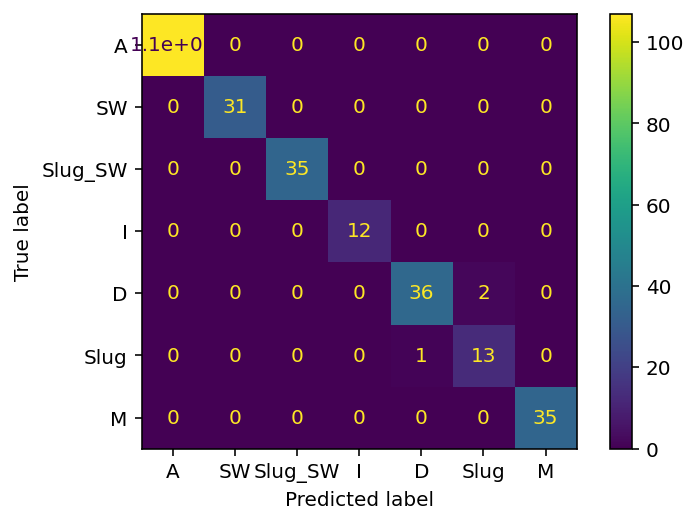

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['A', 'SW', 'Slug_SW', 'I', 'D', 'Slug', 'M']#############################

plot_confusion_matrix(best_grid_search, X_train, y_train, display_labels=class_names)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

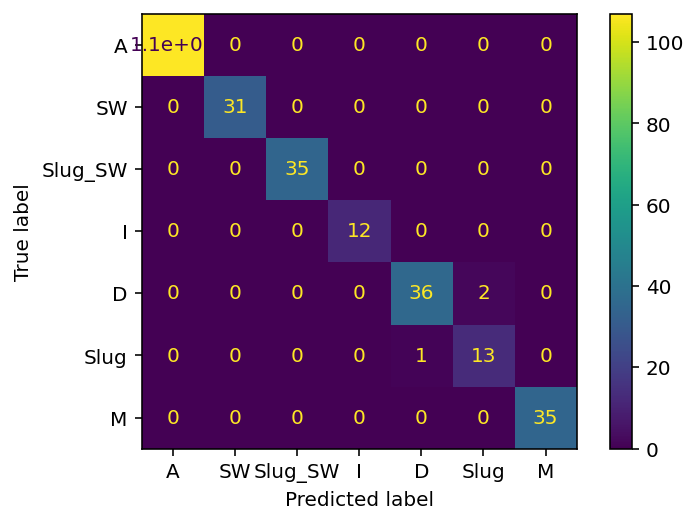

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['A', 'SW', 'Slug_SW', 'I', 'D', 'Slug', 'M']#############################

plot_confusion_matrix(best_grid_search, X_train, y_train, display_labels=class_names)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

#SHAP

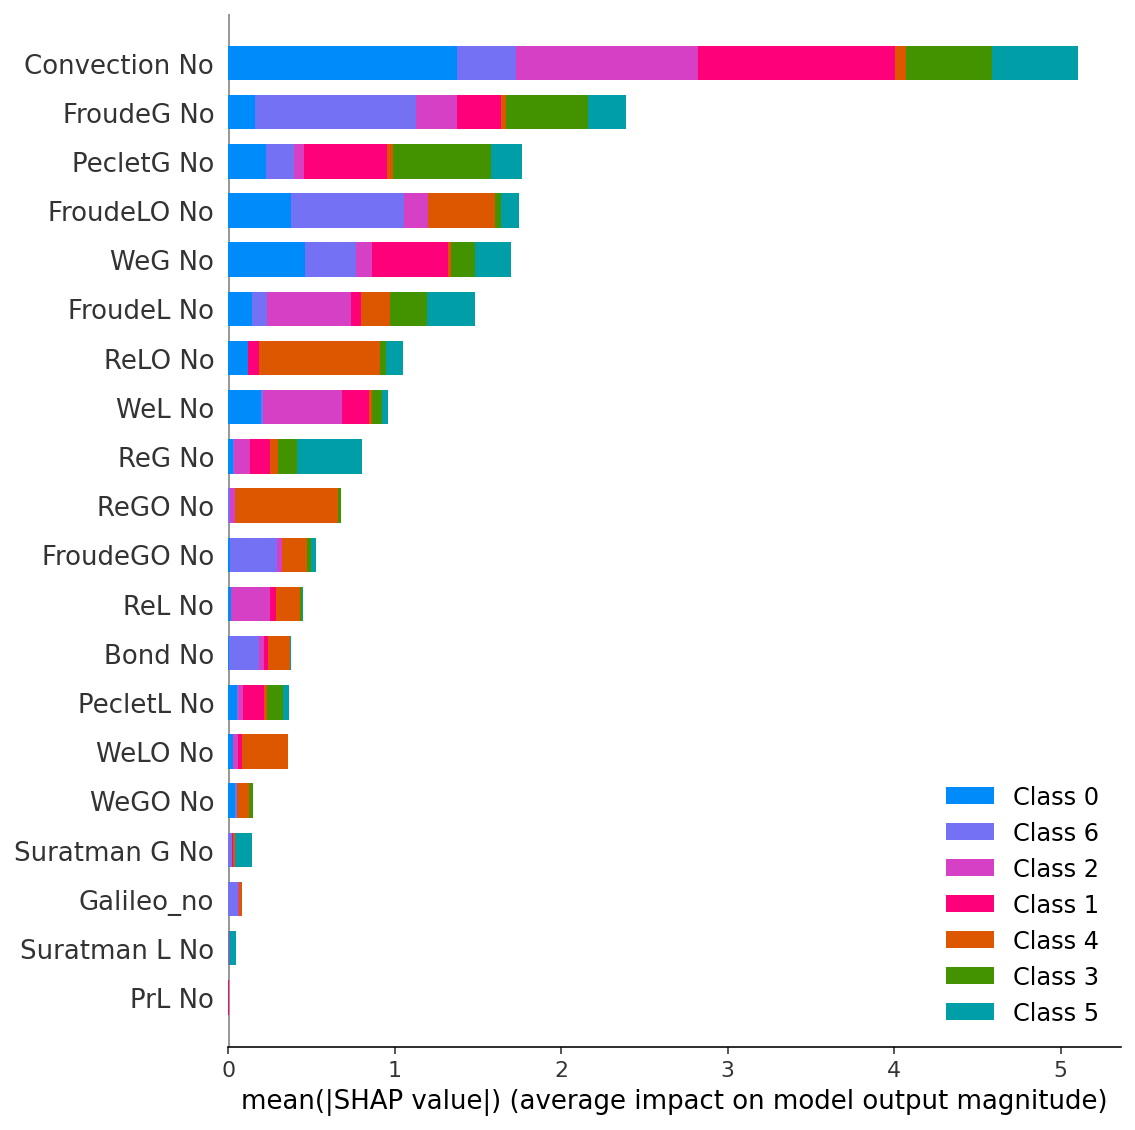

In [ ]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_grid_search)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X)
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X)

#Result

In [ ]:
All_data = pd.read_csv(io.BytesIO(uploaded['Features.csv']))
Xnew = All_data
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('All_data_XGB.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#10

In [ ]:
R_10_1 = pd.read_csv(io.BytesIO(uploaded['In_10_1.csv']))
Xnew = R_10_1
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_10_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R_10_2 = pd.read_csv(io.BytesIO(uploaded['In_10_2.csv']))
Xnew = R_10_2
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_10_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#11

In [ ]:
R_11_1 = pd.read_csv(io.BytesIO(uploaded['In_11_1.csv']))
Xnew = R_11_1
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_11_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R_11_2 = pd.read_csv(io.BytesIO(uploaded['In_11_2.csv']))
Xnew = R_11_2
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_11_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R_11_3 = pd.read_csv(io.BytesIO(uploaded['In_11_3.csv']))
Xnew = R_11_3
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_11_3.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R_11_4 = pd.read_csv(io.BytesIO(uploaded['In_11_4.csv']))
Xnew = R_11_4
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_11_4.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#12

In [ ]:
R_12_1 = pd.read_csv(io.BytesIO(uploaded['In_12_1.csv']))
Xnew = R_12_1
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_12_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R_12_2 = pd.read_csv(io.BytesIO(uploaded['In_12_2.csv']))
Xnew = R_12_2
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_12_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R_12_3 = pd.read_csv(io.BytesIO(uploaded['In_12_3.csv']))
Xnew = R_12_3
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_12_3.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R_12_4 = pd.read_csv(io.BytesIO(uploaded['In_12_4.csv']))
Xnew = R_12_4
ynew= best_grid_search.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('XGB_12_4.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()